# **Milestone 3:**

Evaluating the dictionary-based sentiment analyzer.



*   Sentiment values of the reviews
*   Rating classes
*   Textual evaluation containing precision, recall, and accuracy
*   Confusion matrix





### **Setting up the environment**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###**Importing the required modules**

In [2]:
# importing relevant libraries
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

###**Loading in the small corpus csv**

In [3]:
# importing and reading csv from drive
df = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis for Marketing/Data/small_corpus_sentiment.csv')

In [4]:
# viewing a sample of the data
df.head()

,ratings,reviews,sentiment_score_new
0,1,Recently UBISOFT had to settle a huge class-ac...,-0.010596
1,1,"code didn't work, got me a refund.",0.000000
2,1,"these do not work at all, all i get is static ...",0.000000
3,1,well let me start by saying that when i first ...,-0.021369
4,1,"Dont waste your money, you will just end up us...",0.000000


### **Converting sentiment scores into sentiment classes**

In [5]:
# classifying the reviews as positive, neutral or negative
def categorize_review(score):
  '''
  input:
    score: sentiment score of a certain review
  output:
    integer:
      1: for a positive review
      0: for a neutral review 
      -1: for a negative review
  '''
  if score > 0.2:
    return 1 
  elif -0.2 <= score <= 0.2:
    return 0
  else:
    return -1

In [6]:
# applying the function and augmenting the dataframe
df['sentiment_cat'] = df['sentiment_score_new'].apply(categorize_review)

### **Converting ratings into rating classes**

In [7]:
# classifying the ratings as positive, neutral or negative
def categorize_rating(rating):
  '''
  input:
    rating: rating of a certain review
  output:
    integer:
      1: for a positive review
      0: for a neutral review 
      -1: for a negative review
  '''
  if rating == 5:
    return 1 
  elif 2 <= rating <= 4:
    return 0
  else:
    return -1

In [8]:
# applying the function and augmenting the dataframe
df['rating_cat'] = df['ratings'].apply(categorize_rating)
df.head()

,ratings,reviews,sentiment_score_new,sentiment_cat,rating_cat
0,1,Recently UBISOFT had to settle a huge class-ac...,-0.010596,0,-1
1,1,"code didn't work, got me a refund.",0.000000,0,-1
2,1,"these do not work at all, all i get is static ...",0.000000,0,-1
3,1,well let me start by saying that when i first ...,-0.021369,0,-1
4,1,"Dont waste your money, you will just end up us...",0.000000,0,-1


### **Exporting the dataset to csv**

In [9]:
df.to_csv('/content/drive/MyDrive/Sentiment Analysis for Marketing/Data/small_corpus_sentiment_classes.csv', index=False)

### **Evaluating the sentiment analyzer**

In [10]:
y_pred = list(df['sentiment_cat'])
y_true = list(df['rating_cat'])

a. Accuracy

In [11]:
# accuracy: amount of reviews that are categorized correctly as positive, negative or neutral
# using scikit-learn metric
accuracy = accuracy_score(y_true, y_pred)*100
print(f'The model got {accuracy.round(2)}% of the predictions right.')

The model got 41.62% of the predictions right.


b. Precision

In [12]:
# precision: e.g., ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives (measure of quality)
# using scikit-learn metric
precision = precision_score(y_true, y_pred, labels=[1], average='micro')*100
print(f'The model correctly predicted {precision.round(2)}% of the positive observations compared to the total predicted positive observations.')
precision = precision_score(y_true, y_pred, labels=[0], average='micro')*100
print(f'The model correctly predicted {precision.round(2)}% of the neutral observations compared to the total predicted neutral observations.')
precision = precision_score(y_true, y_pred, labels=[-1], average='micro')*100
print(f'The model correctly predicted {precision.round(2)}% of the negative observations compared to the total predicted negative observations.')

The model correctly predicted 82.34% of the positive observations compared to the total predicted positive observations.
The model correctly predicted 35.76% of the neutral observations compared to the total predicted neutral observations.
The model correctly predicted 74.74% of the negative observations compared to the total predicted negative observations.


c. Recall

In [13]:
# recall (sensitivity): e.g., ratio tp / (tp + fn + fneg) where tp is the number of true positives and fn/fneg the number of false neutrals/negatives (measure of quantity)
# using scikit-learn metric
recall = recall_score(y_true, y_pred, labels=[1], average='micro')*100
print(f'The model correctly predicted {recall.round(2)}% of the positive observations compared to the all observations in the actual class.')
recall = recall_score(y_true, y_pred, labels=[0], average='micro')*100
print(f'The model correctly predicted {recall.round(2)}% of the neutral observations compared to the all observations in the actual class.')
recall = recall_score(y_true, y_pred, labels=[-1], average='micro')*100
print(f'The model correctly predicted {recall.round(2)}% of the negative observations compared to the all observations in the actual class.')

The model correctly predicted 26.73% of the positive observations compared to the all observations in the actual class.
The model correctly predicted 93.4% of the neutral observations compared to the all observations in the actual class.
The model correctly predicted 4.73% of the negative observations compared to the all observations in the actual class.


Interpretation (by means of positive reviews):
*   *It is a terrible classifier if the goal is to retrieve as many positive reviews as possible, because the recall is 32% only, which means we are going to miss 68% of the positive reviews.*
*   *It is a good classifier if the goal is to retrieve just a few positive reviews, because the precision is 82% (low recall doesn't matter in this case).*



d. Classification report

In [14]:
# classification report: text report showing the main classification metrics
# using scikit-learn metric
cr = classification_report(y_true, y_pred)
print(cr)

              precision    recall  f1-score   support

          -1       0.75      0.05      0.09      1500
           0       0.36      0.93      0.52      1500
           1       0.82      0.27      0.40      1500

    accuracy                           0.42      4500
   macro avg       0.64      0.42      0.34      4500
weighted avg       0.64      0.42      0.34      4500



e. Confusion matrix

[[  71 1420    9]
 [  22 1401   77]
 [   2 1097  401]] 



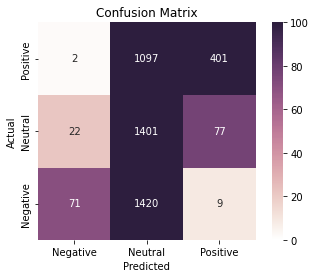

In [15]:
# confusion matrix: tabular way of visualizing the performance of the prediction model
# each entry denotes the number of predictions made by the model where it classified the classes correctly or incorrectly
# using scikit-learn metric
cm = confusion_matrix(y_true, y_pred)
print(cm, '\n')

# plotting the results
df_cm = pd.DataFrame(cm, 
  index = ['Negative', 'Neutral', 'Positive'],
  columns = ['Negative', 'Neutral', 'Positive'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
chart = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='g', cmap=cmap)
chart.invert_yaxis()

plt.yticks([0.5,1.5,2.5], ['Negative', 'Neutral', 'Positive'],va='center')
plt.title('Confusion Matrix')
plt.show()



Summary: 

*The performance of the dictionary-based sentiment analyzer is far from perfect. Regarding the neutral category, precision is extremely low; meanwhile, in the positive and negative categories, recall is not satisfactory. In order to improve the performance, we need to build another sentiment analyzer with another technique.*